In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
import tensorflow as tf
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential 
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import datetime as dt
from sklearn.metrics import mean_squared_error
import sklearn


In [ ]:
numOfNewDataPoints = input("number of new data points. More you do less accurate it gets")
numOfNewDataPoints = int(numOfNewDataPoints)

number of new data points. More you do less accurate it gets100


In [ ]:
df = pd.read_csv('../data/USunemploytraining.csv')
data=df.filter(['unemployment rate'])
print(data)

     unemployment rate
0                  3.4
1                  3.8
2                  4.0
3                  3.9
4                  3.5
..                 ...
876                6.3
877                6.2
878                6.0
879                6.1
880                5.8

[881 rows x 1 columns]


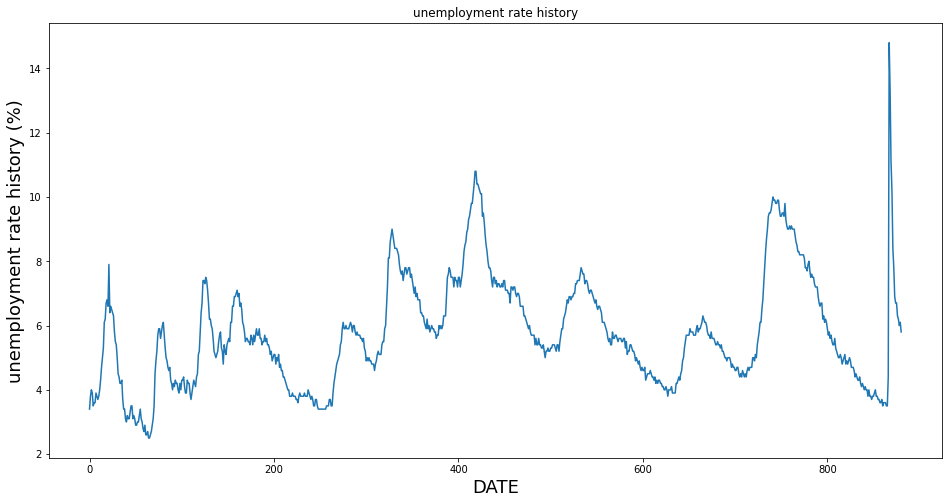

In [ ]:
plt.figure(figsize=(16,8))
plt.title('unemployment rate history')
plt.plot(data['unemployment rate'])
plt.xlabel('DATE', fontsize=18)
plt.ylabel('unemployment rate history (%)', fontsize=18)
plt.show()

In [ ]:
dataset = data.values
training_data_len = math.ceil(len(dataset) * 0.8)

print(training_data_len)

705


In [ ]:
# scale data

scaler = MinMaxScaler(feature_range=(0,1))
#scaled_data = pd.DataFrame(scaler.fit_transform(data),columns = data.columns)
scaled_data = scaler.fit_transform(dataset)

print(scaled_data)

[[0.07317073]
 [0.10569106]
 [0.12195122]
 [0.11382114]
 [0.08130081]
 [0.08943089]
 [0.08943089]
 [0.11382114]
 [0.10569106]
 [0.09756098]
 [0.10569106]
 [0.12195122]
 [0.14634146]
 [0.17886179]
 [0.20325203]
 [0.22764228]
 [0.29268293]
 [0.30081301]
 [0.34146341]
 [0.3495935 ]
 [0.33333333]
 [0.43902439]
 [0.31707317]
 [0.33333333]
 [0.32520325]
 [0.31707317]
 [0.30894309]
 [0.26829268]
 [0.24390244]
 [0.23577236]
 [0.20325203]
 [0.16260163]
 [0.15447154]
 [0.13821138]
 [0.13821138]
 [0.14634146]
 [0.09756098]
 [0.07317073]
 [0.07317073]
 [0.04878049]
 [0.04065041]
 [0.05691057]
 [0.04878049]
 [0.04878049]
 [0.06504065]
 [0.08130081]
 [0.08130081]
 [0.04878049]
 [0.05691057]
 [0.04878049]
 [0.03252033]
 [0.03252033]
 [0.04065041]
 [0.04065041]
 [0.05691057]
 [0.07317073]
 [0.04878049]
 [0.04065041]
 [0.02439024]
 [0.01626016]
 [0.03252033]
 [0.00813008]
 [0.00813008]
 [0.01626016]
 [0.        ]
 [0.        ]
 [0.00813008]
 [0.01626016]
 [0.03252033]
 [0.04878049]
 [0.08130081]
 [0.16

In [ ]:
# create training data set 

train_data = scaled_data[0: training_data_len , :]
# spilt data into x_train and y_train

x_train = []
y_train = []

for i in range(100, len(train_data)):
    x_train.append(train_data[i-100:i, 0])
    y_train.append(train_data[i, 0])
    if i<=101:
        print(x_train)
        print(y_train)

[array([0.07317073, 0.10569106, 0.12195122, 0.11382114, 0.08130081,
       0.08943089, 0.08943089, 0.11382114, 0.10569106, 0.09756098,
       0.10569106, 0.12195122, 0.14634146, 0.17886179, 0.20325203,
       0.22764228, 0.29268293, 0.30081301, 0.34146341, 0.3495935 ,
       0.33333333, 0.43902439, 0.31707317, 0.33333333, 0.32520325,
       0.31707317, 0.30894309, 0.26829268, 0.24390244, 0.23577236,
       0.20325203, 0.16260163, 0.15447154, 0.13821138, 0.13821138,
       0.14634146, 0.09756098, 0.07317073, 0.07317073, 0.04878049,
       0.04065041, 0.05691057, 0.04878049, 0.04878049, 0.06504065,
       0.08130081, 0.08130081, 0.04878049, 0.05691057, 0.04878049,
       0.03252033, 0.03252033, 0.04065041, 0.04065041, 0.05691057,
       0.07317073, 0.04878049, 0.04065041, 0.02439024, 0.01626016,
       0.03252033, 0.00813008, 0.00813008, 0.01626016, 0.        ,
       0.        , 0.00813008, 0.01626016, 0.03252033, 0.04878049,
       0.08130081, 0.16260163, 0.19512195, 0.2195122 , 0.2601

In [ ]:
#convert x_train and y_train to numpy array

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# reshape the data
x_train = np.reshape(x_train, (605, 100, 1))
x_train.shape

(605, 100, 1)

In [ ]:
# build LSTM model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
#model.add(Dense(512))
#model.add(Dense(256))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
print("hello")

hello


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# train

model.fit(x_train, y_train, batch_size=1, epochs=1)

605/605 [==============================] - 59s 89ms/step - loss: 0.0075


In [ ]:
# create the testing data set

test_data = scaled_data[training_data_len - 100: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(100, len(test_data)):
  x_test.append(test_data[i-100:i, 0])



In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test = y_test.reshape(y_test.size, 1)

In [ ]:
rmse=np.sqrt( np.mean((predictions - y_test)**2))
rmse

1.662935137854336

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


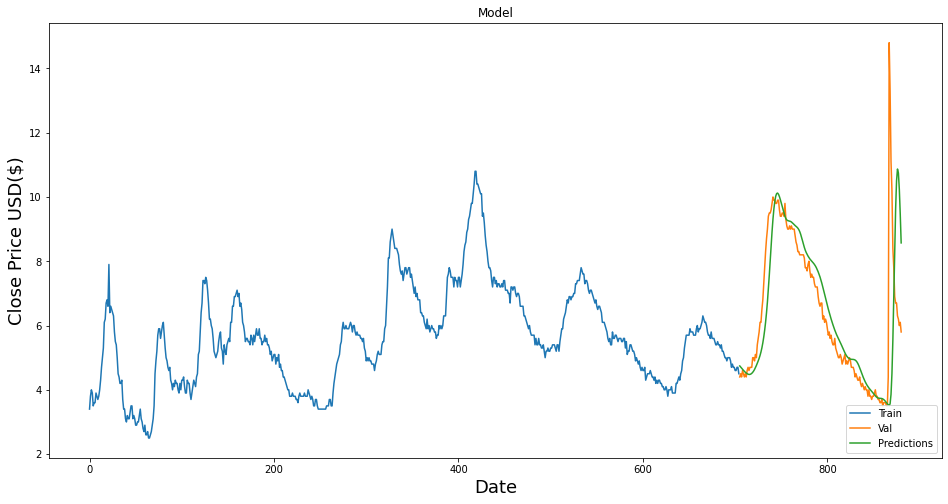

In [ ]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(train['unemployment rate'])
plt.plot(valid[['unemployment rate','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [ ]:
# predict future days 

prediction_days = 100
model_inputs = dataset[len(dataset) - len(test_data) - 100:]
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs + 1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

predictions1 = model.predict(real_data)
predictions1 = scaler.inverse_transform(predictions1)
print(f"predictions1: {predictions1}")  
predictions1 = predictions1[0][0]
print(predictions1)
predictions1 = predictions1
df = pd.read_csv('/content/drive/MyDrive/USunemploytraining copy.csv')
data=df.filter(['unemployment rate'])
xs = df.filter(['unemployment rate'])
print(data)
print(df)
predictionsa = [881, predictions1]
df.append(predictionsa)
print(df)

predictionsb = [predictions1]
a_series = pd.Series(predictionsb, index = data.columns)
data = data.append(a_series, ignore_index=True)
print(data)

predictions1: [[7.657179]]
7.657179
     unemployment rate
0                  3.4
1                  3.8
2                  4.0
3                  3.9
4                  3.5
..                 ...
876                6.3
877                6.2
878                6.0
879                6.1
880                5.8

[881 rows x 1 columns]
     DATE  unemployment rate
0       1                3.4
1       2                3.8
2       3                4.0
3       4                3.9
4       5                3.5
..    ...                ...
876   877                6.3
877   878                6.2
878   879                6.0
879   880                6.1
880   881                5.8

[881 rows x 2 columns]
     DATE  unemployment rate
0       1                3.4
1       2                3.8
2       3                4.0
3       4                3.9
4       5                3.5
..    ...                ...
876   877                6.3
877   878                6.2
878   879                6.0
87

In [ ]:
prediction_days = 100
dataset = data.values

model_inputs = dataset[len(dataset) - len(test_data) - 100:]
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs + 1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

predictions2 = model.predict(real_data)
predictions2 = scaler.inverse_transform(predictions2)
print(f"predictions2: {predictions2}")  
predictions2 = predictions2[0][0]
print(predictions2)
predictionsc = predictions2
a_series = pd.Series(predictionsc, index = data.columns)
data = data.append(a_series, ignore_index=True)

print(data)

predictions2: [[6.8219995]]
6.8219995
     unemployment rate
0             3.400000
1             3.800000
2             4.000000
3             3.900000
4             3.500000
..                 ...
878           6.000000
879           6.100000
880           5.800000
881           7.657179
882           6.822000

[883 rows x 1 columns]


In [ ]:
for i in range(numOfNewDataPoints):
  prediction_days = 100
  dataset = data.values

  model_inputs = dataset[len(dataset) - len(test_data) - 100:]
  model_inputs = model_inputs.reshape(-1, 1)
  model_inputs = scaler.transform(model_inputs)
  real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs + 1), 0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  predictions10 = model.predict(real_data)
  predictions10 = scaler.inverse_transform(predictions10)
  print(f"predictions10: {predictions10}")  
  predictions10 = predictions10[0][0]
  print(predictions10)
  predictionsc = predictions10
  a_series = pd.Series(predictionsc, index = data.columns)
  data = data.append(a_series, ignore_index=True)

  print(data)

predictions10: [[6.136319]]
6.136319
     unemployment rate
0             3.400000
1             3.800000
2             4.000000
3             3.900000
4             3.500000
..                 ...
879           6.100000
880           5.800000
881           7.657179
882           6.822000
883           6.136319

[884 rows x 1 columns]
predictions10: [[5.638145]]
5.638145
     unemployment rate
0             3.400000
1             3.800000
2             4.000000
3             3.900000
4             3.500000
..                 ...
880           5.800000
881           7.657179
882           6.822000
883           6.136319
884           5.638145

[885 rows x 1 columns]
predictions10: [[5.332295]]
5.332295
     unemployment rate
0             3.400000
1             3.800000
2             4.000000
3             3.900000
4             3.500000
..                 ...
881           7.657179
882           6.822000
883           6.136319
884           5.638145
885           5.332295

[886 rows x 

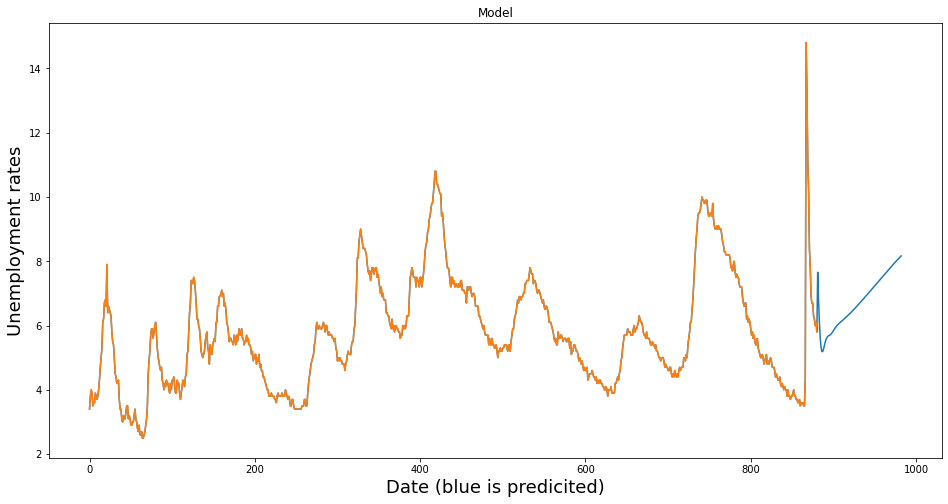

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date (blue is predicited)',fontsize=18)
plt.ylabel('Unemployment rates',fontsize=18)
plt.plot(data)
plt.plot(xs)

plt.show()